In [31]:
import os
import numpy as np
from pprint import pprint
from tqdm import tqdm
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
# # create a Resources/temp/original in current directory
# files = os.listdir("Resources/temp/original")
# files

In [5]:
base_path = 'Resources/'
patient_ids = os.listdir(base_path)
patient_ids

['10253',
 '10254',
 '10255',
 '10256',
 '10257',
 '10258',
 '10259',
 '10260',
 '10261',
 '10262',
 '10264',
 '10268',
 '10269',
 '10272',
 '10273',
 '10274',
 '10275',
 '10276',
 '10277',
 '10278',
 '10279',
 '10282',
 '10285',
 '10286',
 '10288',
 '10290',
 '10291',
 '10292',
 '10293',
 '10295',
 '10299',
 '10300',
 '10301',
 '10302',
 '10303',
 '10304',
 '10305',
 '10306',
 '10307',
 '10308',
 '12241',
 '12242',
 '12626',
 '12748',
 '12749',
 '12750',
 '12751',
 '12752',
 '12810',
 '12811',
 '12817',
 '12818',
 '12819',
 '12820',
 '12821',
 '12822',
 '12823',
 '12824',
 '12826',
 '12867',
 '12868',
 '12869',
 '12870',
 '12871',
 '12872',
 '12873',
 '12875',
 '12876',
 '12877',
 '12878',
 '12879',
 '12880',
 '12881',
 '12882',
 '12883',
 '12884',
 '12886',
 '12890',
 '12891',
 '12892',
 '12893',
 '12894',
 '12895',
 '12896',
 '12897',
 '12898',
 '12900',
 '12901',
 '12905',
 '12906',
 '12907',
 '12908',
 '12909',
 '12910',
 '12911',
 '12929',
 '12930',
 '12931',
 '12932',
 '12933',


In [6]:
class_0_total = 0
class_1_total = 0

In [7]:
for patient_id in patient_ids:
    class_0_files = os.listdir(base_path + patient_id + '/0')
    class_1_files = os.listdir(base_path + patient_id + '/1')

    class_0_total += len(class_0_files)
    class_1_total += len(class_1_files) 

total_images = class_0_total + class_1_total
    
print(f'Number of patches in Class 0: {class_0_total}')
print(f'Number of patches in Class 1: {class_1_total}')
print(f'Total number of patches: {total_images}')

Number of patches in Class 0: 198738
Number of patches in Class 1: 78786
Total number of patches: 277524


In [23]:
columns = ["patient_id",
           #'x','y',
           "target","path"]
data_rows = []
i = 0
iss = 0
isss = 0

In [24]:
#loop through directories and putting images into coordinates with progress meter

for patient_id in tqdm(patient_ids):
    for c in [0,1]:
        
        class_path = base_path + patient_id + '/' + str(c) + '/'
        # print(class_path)
        imgs = os.listdir(class_path)
        
        # Extracting Image Paths
        img_paths = [class_path + img + '/' for img in imgs]
        # print(img_paths)

        img_coords = [img.split('_',4)[2:4] for img in imgs]
        x_coords = [int(coords[0][1:]) for coords in img_coords]
        y_coords = [int(coords[1][1:]) for coords in img_coords]

        for (path #,x,y
            ) in zip(img_paths,x_coords,y_coords):
            values = [patient_id,
                      #x,y,
                      c,path]
            data_rows.append({k:v for (k,v) in zip(columns,values)})

100%|███████████████████████████████████████████████████████████████████████████████| 279/279 [00:02<00:00, 136.72it/s]


In [25]:
data = pd.DataFrame(data_rows)
data

,patient_id,target,path
0,10253,0,(Resources/10253/0/10253_idx5_x1001_y1001_clas...
1,10253,0,(Resources/10253/0/10253_idx5_x1001_y1051_clas...
2,10253,0,(Resources/10253/0/10253_idx5_x1001_y1101_clas...
3,10253,0,(Resources/10253/0/10253_idx5_x1001_y1151_clas...
4,10253,0,(Resources/10253/0/10253_idx5_x1001_y1201_clas...
...,...,...,...
277519,9383,1,(Resources/9383/1/9383_idx5_x2051_y901_class1....
277520,9383,1,(Resources/9383/1/9383_idx5_x2051_y951_class1....
277521,9383,1,(Resources/9383/1/9383_idx5_x2101_y1001_class1...
277522,9383,1,(Resources/9383/1/9383_idx5_x2101_y901_class1....


In [26]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf


In [27]:
# creating our y from target
y = data["target"].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [29]:
# removing y from data
data1 = data.drop('target', 1)
data2 = data.drop('patient_id', 1)
data2

,target,path
0,0,(Resources/10253/0/10253_idx5_x1001_y1001_clas...
1,0,(Resources/10253/0/10253_idx5_x1001_y1051_clas...
2,0,(Resources/10253/0/10253_idx5_x1001_y1101_clas...
3,0,(Resources/10253/0/10253_idx5_x1001_y1151_clas...
4,0,(Resources/10253/0/10253_idx5_x1001_y1201_clas...
...,...,...
277519,1,(Resources/9383/1/9383_idx5_x2051_y901_class1....
277520,1,(Resources/9383/1/9383_idx5_x2051_y951_class1....
277521,1,(Resources/9383/1/9383_idx5_x2101_y1001_class1...
277522,1,(Resources/9383/1/9383_idx5_x2101_y901_class1....


In [57]:
# encoding our data1 

data.loc[idx, "path"]


('Resources/10260/1/10260_idx5_x1001_y751_class1.png/', 1001, 751)

In [32]:
# randomly select some candidates for image showcase 

pos_selection = np.random.choice(data[data.target==1].index.values, size=50, replace=False)
neg_selection = np.random.choice(data[data.target==0].index.values, size=50, replace=False)

In [58]:
pos_selection

array([  5708, 194776, 167802,  70274, 276725,  44265, 276714, 158565,
       191622,  41403,  57916, 133760,  56474, 222722, 251119,  42451,
        16376, 168214, 126633, 242855, 247856,  74617, 211157, 183116,
        36460,  20962,  89118, 169792, 131096,  37755,    488, 160750,
       175420, 237861,  72443, 121981, 215755, 149821,   5711, 114467,
        17071,  78238, 132343,   2584,  31971,   8172, 269308,  73856,
       109278, 273192], dtype=int64)

TypeError: expected str, bytes or os.PathLike object, not int

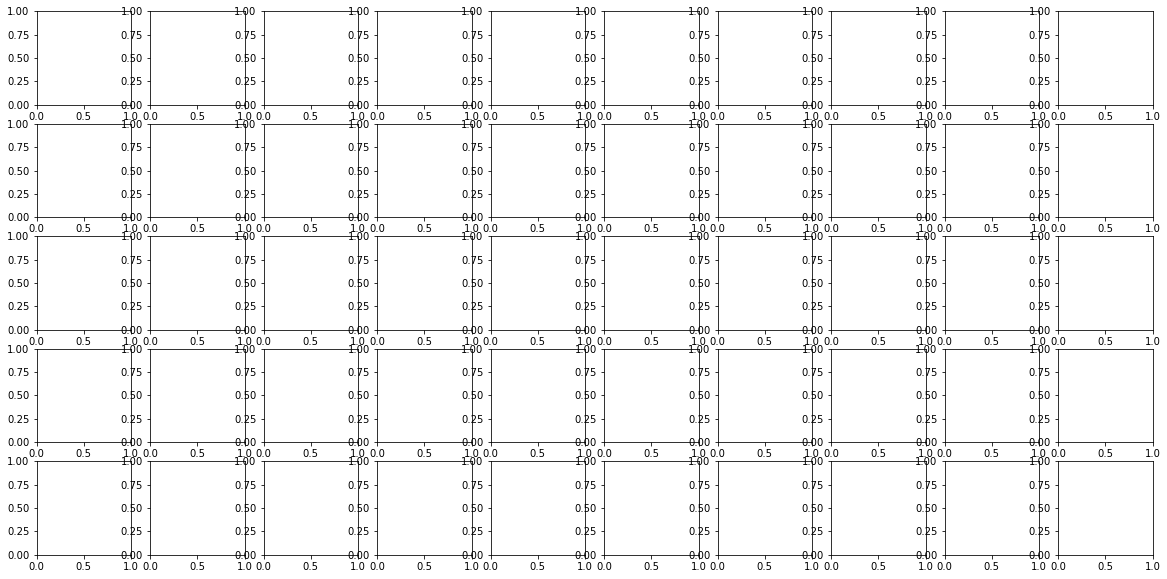

In [45]:
# showcasing the random images of positive idc 
from matplotlib.pyplot import imshow, imread
import numpy as np

fig, ax = plt.subplots(5,10,figsize=(20,10))



for n in range(5):
    for m in range(10):
        idx = pos_selection[m + 1 0*n]
        image = imread(data.loc[idx])
        ax[n,m].imshow(image)
        ax[n,m].grid(False)



In [15]:
data.shape

(555527, 5)

In [16]:
data.patient_id.value_counts()

13693    4790
16550    4604
10288    4556
10308    4556
9323     4432
         ... 
16895     302
9175      236
8957      222
9262      188
16534     126
Name: patient_id, Length: 279, dtype: int64

In [17]:
target_count = data.groupby('patient_id').target.value_counts()
target_count

patient_id  target
10253       0         1437
            1          140
10254       0         1544
            1          152
10255       0          362
                      ... 
9381        1          256
9382        0         2612
            1          692
9383        0          988
            1          140
Name: target, Length: 558, dtype: int64

In [18]:
target_size = data.groupby('patient_id').target.size()
target_size

patient_id
10253    1577
10254    1696
10255     544
10256     936
10257    1270
         ... 
9346     2722
9347      820
9381     2652
9382     3304
9383     1128
Name: target, Length: 279, dtype: int64

In [19]:
pids = data.patient_id.unique()
pids

array(['10253', '10254', '10255', '10256', '10257', '10258', '10259',
       '10260', '10261', '10262', '10264', '10268', '10269', '10272',
       '10273', '10274', '10275', '10276', '10277', '10278', '10279',
       '10282', '10285', '10286', '10288', '10290', '10291', '10292',
       '10293', '10295', '10299', '10300', '10301', '10302', '10303',
       '10304', '10305', '10306', '10307', '10308', '12241', '12242',
       '12626', '12748', '12749', '12750', '12751', '12752', '12810',
       '12811', '12817', '12818', '12819', '12820', '12821', '12822',
       '12823', '12824', '12826', '12867', '12868', '12869', '12870',
       '12871', '12872', '12873', '12875', '12876', '12877', '12878',
       '12879', '12880', '12881', '12882', '12883', '12884', '12886',
       '12890', '12891', '12892', '12893', '12894', '12895', '12896',
       '12897', '12898', '12900', '12901', '12905', '12906', '12907',
       '12908', '12909', '12910', '12911', '12929', '12930', '12931',
       '12932', '129

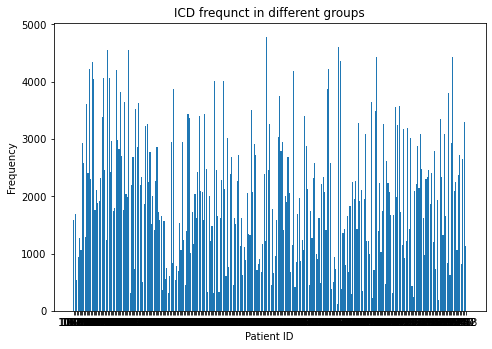

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('ICD frequnct in different groups')
ax.set_ylabel('Frequency')
ax.set_xlabel('Patient ID')
ax.bar(pids,  data.groupby('patient_id').target.size())
plt.show()